In [123]:
from Acquisition_config import ACQUISITION_CONFIG
import sys
import time
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\Synth')
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\Exceptions')
sys.path.append(r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\DAQ')
import Synthesizer
from logs.logging_config import LOGGING_CONFIG
from logging.config import dictConfig
import logging
import json
from Exceptions import replace_non_serializable
import DAQ
import niscope as ni
import numpy as np
import matplotlib.pyplot as plt

In [124]:
filepath = r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\API'

In [125]:
res   = 5.3466
span  = 1e-1
start = res-span
stop  = res+span
num = 2000

In [126]:
fs = np.linspace(start,stop,num)

In [127]:
dictConfig(LOGGING_CONFIG)
logger = logging.getLogger(__name__)
logger.info('START EXECUTION')

19:58:27.586 - __main__ - <module> - INFO - START EXECUTION


In [128]:
try:
    cfg1 = json.dumps(replace_non_serializable(ACQUISITION_CONFIG))
    logger.info('Dumping acquisition configuration')
    with open(ACQUISITION_CONFIG['acq_conf']['path'] + 'config.json','w') as f:
        f.write(cfg1)
except Exception:
    logger.critical('Dumping acquisition configuration')
    raise SystemError("Could not dump acquisition configuration!")

19:58:27.893 - __main__ - <module> - INFO - Dumping acquisition configuration


In [129]:
try:
    daq = DAQ.DAQ()
    logger.info('DAQ class object correctly created')
except Exception:
    logger.critical('Could not crate DAQ class object')
    raise SyntaxError('Could not create DAQ class object')

19:58:28.190 - __main__ - <module> - INFO - DAQ class object correctly created


In [130]:
try:
    s1 = Synthesizer.Synthesizer(1)
    s1.connettore()
    logger.info('Synth class object correctly created and connected!')
except Exception:
    logger.critical('Could not crate synth class object')
    raise SyntaxError('Could not create synth class object')

Synth_uno!
Si è connessi al synth_uno!
19:58:28.572 - __main__ - <module> - INFO - Synth class object correctly created and connected!


In [131]:
channels = {'I'			: 0, 
            'Q'			: 1,
            'trigger'	: 0}

In [132]:
devicename =  'PXI1Slot4'

In [133]:
try:
    daq.reset_with_def()
    daq.get_status
    logger.info('Resetting DAQ with defaults')
except Exception:
    logger.error('Could not reset DAQ with defaults')
    pass

19:58:29.339 - __main__ - <module> - ERROR - Could not reset DAQ with defaults


In [134]:
try:
    daq.acq_conf = ACQUISITION_CONFIG['acq_conf']
    logger.info('Inserting acquisition configuration from ACQUISITION_CONFIG dictionary')
except Exception:
    logger.warning('Coulkd not insert acquisition configuration')
    raise SystemError('Coulkd not insert acquisition configuration')

19:58:29.804 - __main__ - <module> - INFO - Inserting acquisition configuration from ACQUISITION_CONFIG dictionary


In [135]:
try:
    daq.horizontal_conf = ACQUISITION_CONFIG['horizontal']
    logger.info('Inserting hconf dic')
except Exception:
    logger.warning('Could not insert hconf dic')
    raise SystemError('Could not insert hconf dic')

19:58:30.095 - __main__ - <module> - INFO - Inserting hconf dic


In [136]:
try:
    daq.vertical_conf = ACQUISITION_CONFIG['vertical']
    logger.info('Inserting vconf dic')
except Exception:
    logger.warning('Could not insert vconf dic')
    raise SystemError('Could not insert vconf dic')

19:58:30.527 - __main__ - <module> - INFO - Inserting vconf dic


In [137]:
try:
    daq.chan_conf = ACQUISITION_CONFIG['chan_conf']
    logger.info('Inserting chan char dic')
except Exception:
    logger.warning('Could not insert chan char dic')
    raise SystemError('Could not insert chan char dic')

19:58:30.838 - __main__ - <module> - INFO - Inserting chan char dic


In [138]:
try:
    daq.trigger_dic = ACQUISITION_CONFIG['trigger']
    logger.info('Inserting trigger dic')
except Exception:
    logger.warning('Could not insert trigger dic')
    raise SystemError('Could not insert trigger dic')

19:58:31.288 - __main__ - <module> - INFO - Inserting trigger dic


In [139]:
try:
    daq._session = ni.Session(devicename)
    logger.info('Creating new session!!!')
except Exception:
    logger.critical('Could not create new Niscope sesison')
    raise SystemError('Could not create new Niscope session')

19:58:31.728 - __main__ - <module> - INFO - Creating new session!!!


In [140]:
try:
    if daq._session is not None:
        daq.config_trigger()
        logger.info('implementing trigger')
    else:
        pass
except Exception:
    logger.warning('Could not implement trigger')
    raise SystemError('Could not implement trigger')

19:58:32.032 - __main__ - <module> - INFO - implementing trigger


In [141]:
s1.set_frequency(str(fs[0])+'GHz')
s1.outp_frequency_on()

In [142]:
daq._session = ni.Session(devicename)
daq.config_trigger()
with daq._session as session:
    logger.info('Configuring channels')
    daq.configure_channels()
    data = {'CH0': [],
            'CH1': [],
            'CH2': [],
            'CH3': []}
    wf_info = []
    try:
        
        logger.info('Session initiated')
    except Exception:
        logger.critical('Could not initiate session')
    
#    waveforms = session.channels[0, 1].fetch()
    
    for f in fs:
        s1.set_frequency(str(f) + 'GHz') # set frequency
        time.sleep(0.1)
        print(str(s1.get_frequency()))
        daq._session.initiate()
        waveforms = session.channels[0, 1].fetch()
        data['CH0'].append(np.array(waveforms[0].samples.tolist()).mean())
        data['CH1'].append(np.array(waveforms[1].samples.tolist()).mean())    
        time.sleep(0.1)
    # N.B. Per 5000 punti ci si impiega poco più di 17 minuti...

19:58:33.226 - __main__ - <module> - INFO - Configuring channels
19:58:33.228 - __main__ - <module> - INFO - Session initiated
5246600000000

5246700050025

5246800100050

5246900150075

5247000200100

5247100250125

5247200300150

5247300350175

5247400400200

5247500450225

5247600500250

5247700550275

5247800600300

5247900650325

5248000700350

5248100750375

5248200800400

5248300850425

5248400900450

5248500950475

5248601000500

5248701050525

5248801100550

5248901150575

5249001200600

5249101250625

5249201300650

5249301350675

5249401400700

5249501450725

5249601500750

5249701550775

5249801600800

5249901650825

5250001700850

5250101750875

5250201800900

5250301850925

5250401900950

5250501950975

5250602001000

5250702051026

5250802101051

5250902151076

5251002201101

5251102251126

5251202301151

5251302351176

5251402401201

5251502451226

5251602501251

5251702551276

5251802601301

5251902651326

5252002701351

5252102751376

5252202801401

5252302851426

525

In [ ]:
data['time'] = np.arange(0,len(data['CH0']),1)

In [ ]:
I = np.array(data['CH1'])
Q = np.array(data['CH0'])
C = Q + 1j*I
P = np.unwrap(np.angle(C))
S = np.abs(C)

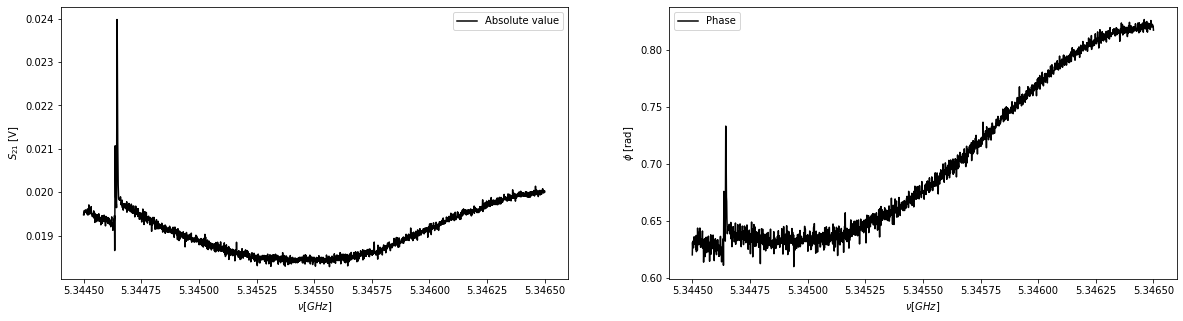

In [ ]:
fig, axs  = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(fs,S, label='Absolute value',  color='black')
axs[1].plot(fs,P, label='Phase', color='black')
axs[0].set_xlabel(r'$\nu [GHz]$')
axs[1].set_xlabel(r'$\nu [GHz]$')
axs[0].set_ylabel(r'$S_{21}$ [V]')
axs[1].set_ylabel(r'$\phi$ [rad]')
axs[0].legend()
axs[1].legend()
fig.savefig('WIDEPLOT_SP.png')

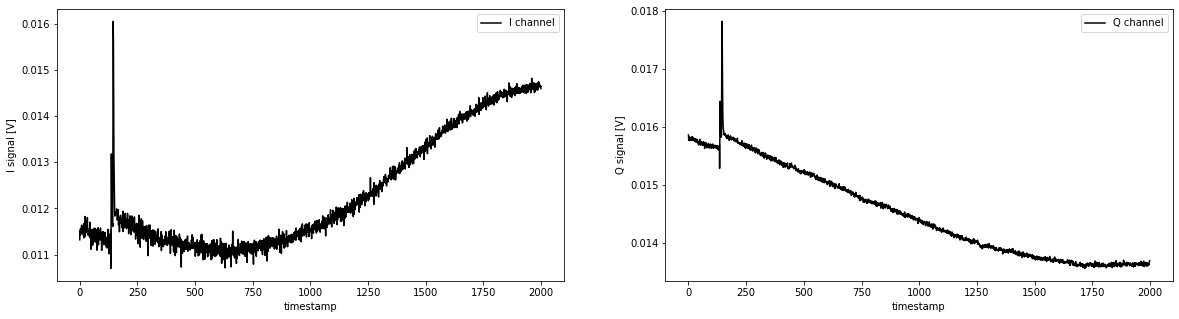

In [ ]:
fig, axs  = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(data['time'],I, label='I channel', color='black')
axs[1].plot(data['time'],Q, label='Q channel', color='black')
#axs[0].axhline(ACQUISITION_CONFIG['trigger']['level'], color='gray', linestyle='--', label='High limit')
#axs[1].axhline(ACQUISITION_CONFIG['trigger']['level'], color='gray', linestyle='--', label='High limit')
axs[0].set_xlabel('timestamp')
axs[1].set_xlabel('timestamp')
axs[0].set_ylabel('I signal [V]')
axs[1].set_ylabel('Q signal [V]')
axs[0].legend()
axs[1].legend()
fig.savefig('WIDEPLOT_IQ.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


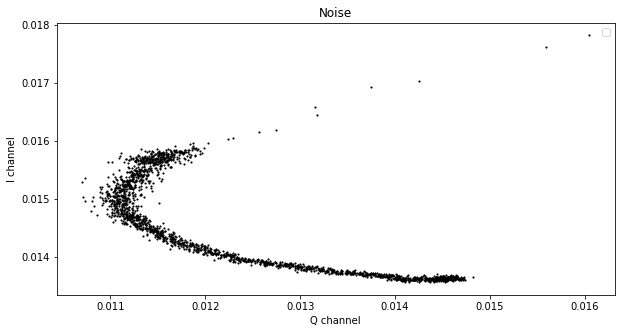

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.scatter(data['CH1'],data['CH0'],marker='.',s=5, color = 'black')
plt.xlabel('Q channel')
plt.ylabel('I channel')
plt.legend()
plt.title('Noise')
fig.savefig('WIDEPLOT_IvsQ.png')

In [ ]:
with open('smallscan_FIQ.txt', 'w') as file:
    file.writelines('F\tI\tQ\n')
    for i in range(len(I)):
        file.writelines(str(fs[i])+'\t'+str(I[i])+'\t'+str(Q[i])+'\n')

with open('smallscan_TIQ.txt', 'w') as file:
    file.writelines('T\tI\tQ\n')
    for i in range(len(I)):
        file.writelines(str(data['time'][i])+'\t'+str(I[i])+'\t'+str(Q[i])+'\n')

NameError: name 'F' is not defined